<a href="https://colab.research.google.com/github/meghanaaggadi-1/projects/blob/masterr/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*SR UNIVERSITY*
**AGGADI MEGHANA**


**HOUSE PRICE PREDICTION**

Mount Google **Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 **Import required libraries**

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

**Load Data**

**understanding the dataset**

In [ ]:
housing = pd.read_csv("/content/drive/MyDrive/Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
housing.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [ ]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


**Statistical Information of Data**

In [ ]:
print(housing.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


**2: Data Preparation**

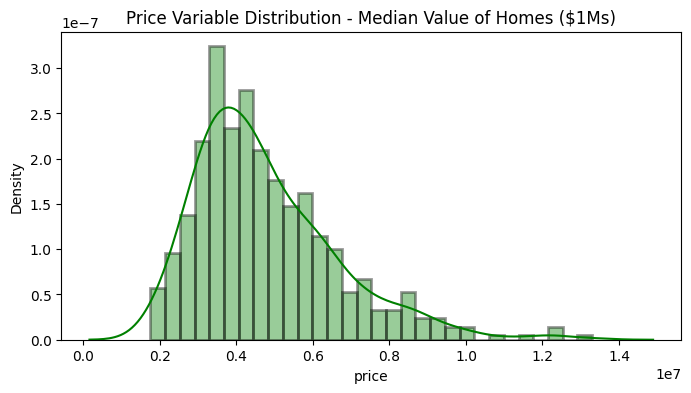

In [ ]:
plt.figure(figsize=[8,4])
sns.distplot(housing['price'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Price Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

**3: Data Cleaning**

In [ ]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

**5: Outlier Removal**

In [ ]:
housing.shape

(545, 13)

In [ ]:
housing.price.describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

In [ ]:
#will remove any outlier beyond (mean + 3 Std) & (mean - 3 Std)

max_threshold = housing['price'].mean() + 3 * housing['price'].std()
min_threshold = housing['price'].mean() - 3 * housing['price'].std()
max_threshold, min_threshold

(10378048.0946786, -844589.5992657552)

In [ ]:
h1 = housing[(housing['price'] > min_threshold) & (housing['price'] < max_threshold)]
h1.reset_index(drop=True,inplace=True)
h1.shape

(539, 13)

In [ ]:
housing.shape[0] - h1.shape[0]

6

** 6: Machine Learning**

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
h2 = pd.get_dummies(data = h1, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', \
                                            'airconditioning', 'prefarea', 'furnishingstatus'], dtype=int)
h2.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,10150000,8580,4,3,4,2,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0
1,10150000,16200,5,3,2,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1
2,9870000,8100,4,1,2,2,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0
3,9800000,5750,3,2,4,1,0,1,0,1,1,0,1,0,0,1,0,1,0,0,1
4,9800000,13200,3,1,2,2,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0


In [ ]:
X = h2.drop(['price'], axis='columns')
y = h2['price']

In [ ]:
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,8580,4,3,4,2,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0
1,16200,5,3,2,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1
2,8100,4,1,2,2,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0
3,5750,3,2,4,1,0,1,0,1,1,0,1,0,0,1,0,1,0,0,1
4,13200,3,1,2,2,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0


In [ ]:
y

0      10150000
1      10150000
2       9870000
3       9800000
4       9800000
         ...   
534     1820000
535     1767150
536     1750000
537     1750000
538     1750000
Name: price, Length: 539, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,confusion_matrix,r2_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion='squared_error',splitter='best',max_depth = 10, min_samples_split=20,random_state=42)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=20, random_state=42)

In [ ]:
dtr.score(X_test, y_test)

0.6805078522904546

In [ ]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.score(X_test, y_test)

0.725077434143369

2ND QUESTION
NUMBER GUESSING

In [ ]:
import random

secret_number = random.randint(1, 100)
guesses = 0

while True:
  guess = int(input("Guess a number between 1 and 100: "))
  guesses += 1

  if guess == secret_number:
    print("You guessed it! ")
    print(f"It took you {guesses} guesses.")
    break
  elif guess < secret_number:
    print("Your guess is too low. Try again!")
  else:
    print("Your guess is too high. Try again!")

Your guess is too high. Try again!
Your guess is too high. Try again!
